In [15]:
#import libraries

import geopandas
import pandas
import numpy
import matplotlib
import matplotlib.pyplot as mplot
import mapclassify
import warnings
warnings.filterwarnings("ignore")

In [16]:
usaMapDF = geopandas.read_file("cb_2022_us_county_5m.shp")
usaMapDF = usaMapDF.sort_values(by=['STUSPS'])
usaMapDF

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
270,02,105,02371430,0500000US02105,02105,Hoonah-Angoon,Hoonah-Angoon Census Area,AK,Alaska,05,16978039504,7804886155,"MULTIPOLYGON (((-133.59854 57.86028, -133.1769..."
318,02,164,01419975,0500000US02164,02164,Lake and Peninsula,Lake and Peninsula Borough,AK,Alaska,04,61724164724,25989695209,"MULTIPOLYGON (((-157.32611 56.54037, -157.2986..."
763,02,240,01419983,0500000US02240,02240,Southeast Fairbanks,Southeast Fairbanks Census Area,AK,Alaska,05,64312145209,749823085,"POLYGON ((-146.99993 63.85975, -146.99991 64.2..."
387,02,290,01419987,0500000US02290,02290,Yukon-Koyukuk,Yukon-Koyukuk Census Area,AK,Alaska,05,377038947604,5944745270,"POLYGON ((-161.04818 62.55241, -160.99620 62.5..."
1818,02,282,01419986,0500000US02282,02282,Yakutat,Yakutat City and Borough,AK,Alaska,03,19744183834,3986144517,"POLYGON ((-143.89333 60.02417, -143.58683 60.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,56,005,01605068,0500000US56005,56005,Campbell,Campbell County,WY,Wyoming,06,12437291886,11010427,"POLYGON ((-106.02481 44.99369, -105.92818 44.9..."
284,56,029,01605079,0500000US56029,56029,Park,Park County,WY,Wyoming,06,17972027722,67638744,"POLYGON ((-111.05689 44.86666, -111.05563 44.9..."
283,56,027,01605078,0500000US56027,56027,Niobrara,Niobrara County,WY,Wyoming,06,6801380673,4969450,"POLYGON ((-104.89994 43.49964, -104.05479 43.5..."
1271,56,019,01609191,0500000US56019,56019,Johnson,Johnson County,WY,Wyoming,06,10759204099,52952166,"POLYGON ((-107.36962 44.55984, -107.29644 44.5..."


In [19]:
#clean columns
countryMapDF = usaMapDF[['GEOID', 'NAME', 'STATE_NAME','geometry']]
countryMapDF = countryMapDF.rename(columns={'NAME':'COUNTY'})
countryMapDF.reset_index(drop=True, inplace=True)
countryMapDF

,GEOID,COUNTY,STATE_NAME,geometry
0,02105,Hoonah-Angoon,Alaska,"MULTIPOLYGON (((-133.59854 57.86028, -133.1769..."
1,02164,Lake and Peninsula,Alaska,"MULTIPOLYGON (((-157.32611 56.54037, -157.2986..."
2,02240,Southeast Fairbanks,Alaska,"POLYGON ((-146.99993 63.85975, -146.99991 64.2..."
3,02290,Yukon-Koyukuk,Alaska,"POLYGON ((-161.04818 62.55241, -160.99620 62.5..."
4,02282,Yakutat,Alaska,"POLYGON ((-143.89333 60.02417, -143.58683 60.2..."
...,...,...,...,...
3230,56005,Campbell,Wyoming,"POLYGON ((-106.02481 44.99369, -105.92818 44.9..."
3231,56029,Park,Wyoming,"POLYGON ((-111.05689 44.86666, -111.05563 44.9..."
3232,56027,Niobrara,Wyoming,"POLYGON ((-104.89994 43.49964, -104.05479 43.5..."
3233,56019,Johnson,Wyoming,"POLYGON ((-107.36962 44.55984, -107.29644 44.5..."


In [24]:
#slice Alaska and Hawaii
countryMapDF = countryMapDF[(countryMapDF['STUSPS'] !='HI')#HAWAII
                          &(countryMapDF['STUSPS'] !='AK')#ALASKA
                          &(countryMapDF['STUSPS'] !='PR')#P.R
                          &(countryMapDF['STUSPS'] !='MP')#MARIANA ISLDS
                          &(countryMapDF['STUSPS'] !='AS')#AM.SAMOA
                          &(countryMapDF['STUSPS'] !='GU')#GUAM
                          &(countryMapDF['STUSPS'] !='VI')#VIRGIN ISLDS
                          ] 
countryMapDF.plot(figsize=(12,12))


KeyError: 'STUSPS'

<Axes: >

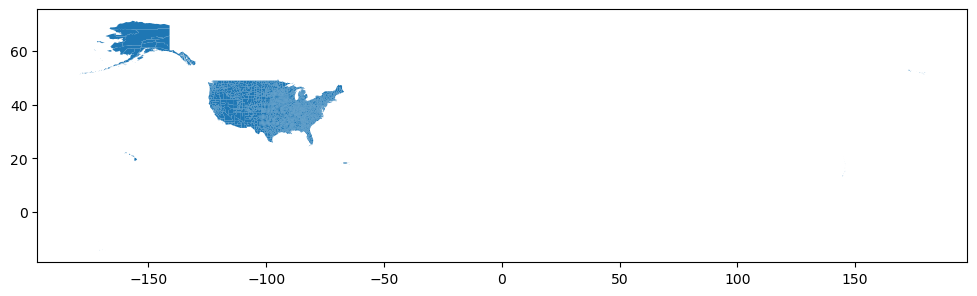

In [25]:
countryMapDF.plot(figsize=(12,12))

In [26]:
#import the COVID-19 dataset

covid19DF = pandas.read_csv("us-counties-recent.csv")
covid19DF

,date,county,state,fips,cases,deaths
0,2023-02-22,Autauga,Alabama,1001.0,19732,230.0
1,2023-02-22,Baldwin,Alabama,1003.0,69641,724.0
2,2023-02-22,Barbour,Alabama,1005.0,7451,112.0
3,2023-02-22,Bibb,Alabama,1007.0,8067,109.0
4,2023-02-22,Blount,Alabama,1009.0,18616,261.0
...,...,...,...,...,...,...
97696,2023-03-23,Sweetwater,Wyoming,56037.0,12519,139.0
97697,2023-03-23,Teton,Wyoming,56039.0,12150,16.0
97698,2023-03-23,Uinta,Wyoming,56041.0,6416,43.0
97699,2023-03-23,Washakie,Wyoming,56043.0,2700,51.0


In [27]:
covid19DF.dtypes

date       object
county     object
state      object
fips      float64
cases       int64
deaths    float64
dtype: object

In [28]:
#modify the the dataframes to allow for seamless joining (remove decimal and add 0 at start forf values under 5 digits)
covid19DF['fips'] = covid19DF['fips'].astype(str)
covid19DF['fips'] = covid19DF['fips'].str.rstrip('.0')
covid19DF['fips'] = covid19DF['fips'].str.zfill(5)
covid19DF

,date,county,state,fips,cases,deaths
0,2023-02-22,Autauga,Alabama,01001,19732,230.0
1,2023-02-22,Baldwin,Alabama,01003,69641,724.0
2,2023-02-22,Barbour,Alabama,01005,7451,112.0
3,2023-02-22,Bibb,Alabama,01007,8067,109.0
4,2023-02-22,Blount,Alabama,01009,18616,261.0
...,...,...,...,...,...,...
97696,2023-03-23,Sweetwater,Wyoming,56037,12519,139.0
97697,2023-03-23,Teton,Wyoming,56039,12150,16.0
97698,2023-03-23,Uinta,Wyoming,56041,6416,43.0
97699,2023-03-23,Washakie,Wyoming,56043,2700,51.0


In [29]:
print(type(countryMapDF))
print(type(covid19DF))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [30]:
countyCovidDF = countryMapDF.set_index('GEOID').join(covid19DF.set_index('fips'))
countyCovidDF

,COUNTY,STATE_NAME,geometry,date,county,state,cases,deaths
GEOID,,,,,,,,
01001,Autauga,Alabama,"POLYGON ((-86.91760 32.66417, -86.81657 32.660...",2023-02-22,Autauga,Alabama,19732.0,230.0
01001,Autauga,Alabama,"POLYGON ((-86.91760 32.66417, -86.81657 32.660...",2023-02-23,Autauga,Alabama,19732.0,230.0
01001,Autauga,Alabama,"POLYGON ((-86.91760 32.66417, -86.81657 32.660...",2023-02-24,Autauga,Alabama,19732.0,230.0
01001,Autauga,Alabama,"POLYGON ((-86.91760 32.66417, -86.81657 32.660...",2023-02-25,Autauga,Alabama,19732.0,230.0
01001,Autauga,Alabama,"POLYGON ((-86.91760 32.66417, -86.81657 32.660...",2023-02-26,Autauga,Alabama,19732.0,230.0
...,...,...,...,...,...,...,...,...
72153,Yauco,Puerto Rico,"POLYGON ((-66.92652 18.15127, -66.89170 18.147...",2023-03-22,Yauco,Puerto Rico,11811.0,NaN
72153,Yauco,Puerto Rico,"POLYGON ((-66.92652 18.15127, -66.89170 18.147...",2023-03-23,Yauco,Puerto Rico,11826.0,NaN
78010,St. Croix,United States Virgin Islands,"POLYGON ((-64.88745 17.76336, -64.87235 17.769...",NaN,NaN,NaN,NaN,NaN


In [ ]:
#creating input variables to specify the date to be selcted and the data columns -- cases or deaths
selectedDate = input("Enter the date to display using format YYYY-MM-DD: ")
selectedColumn = input("Enter 1 for 'cases' and 2 for 'deaths': ")
print("The plot date is:", selectedDate)
print("The selected column is:", selectedColumn)

selectedCovidCountyDF = countyCovidDF.loc[(countyCovidDF['date'] == selectedDate)]
if(selectedColumn == "1"):
    mapVariable = 'cases'
else:
    mapVariable = 'deaths'
    
#create map
displayFigure = mplot.figure(figsize=(20,15))
displayAxis = displayFigure.add_subplot()

selectedCovidCountyDF.plot(ax = displayAxis,
                          column = mapVariable,
                          cmap ='Reds',
                          linewidth = .3,
                          edgecolor = 'black',
                          legend = True,
                          alpha = .7,
                          scheme = 'quantiles',
                          )
displayAxis.axis('off')
title = 'COVID ' + str.capitalize(mapVariable) + ' by County\nas of' + selectedDate
displayAxis.set_title(title, fontsize=18, ha ='center')

The plot date is: 2023-03-20
The selected column is: 2


NameError: name 'countyCovidDF' is not defined